In [137]:
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [102]:
fileURL = "car.data"
car_data = pd.read_csv(fileURL, names=['Buying', 'Maintainence', 'Doors', 'Persons', 'Lug_Boots', 'Safety', 'Acceptability'] , header=None)

In [103]:
y = car_data['Acceptability'].as_matrix()
y = preprocessing.label_binarize(y, classes=['unacc', 'acc', 'good', 'vgood'])
n_classes = y.shape[1]
lex = preprocessing.LabelEncoder()
x = car_data.ix[:,0:6].as_matrix()
new_x = lex.fit_transform(x[0])
for i in x[1:]:
    new_x = np.vstack([new_x, lex.fit_transform(i)])
frame_data = pd.DataFrame(new_x, columns=['Buying', 'Maintainence', 'Doors', 'Persons', 'Lug_Boots', 'Safety'])

In [104]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=.5)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# The accuracy of your model on the test data

In [105]:
# Predict X_test
pred_x = clf.predict(X_test)
# Find the accuracy of the true values and predicted values
accuracy_score(y_test, pred_x)

0.65740740740740744

# The precision and recall values

In [106]:
true_stack = np.hstack(y_test)
pred_stack = np.hstack(pred_x)
print("The precision values: ")
print(precision_score(true_stack, pred_stack))
print("The recall values: ")
print(recall_score(true_stack, pred_stack))

The precision values: 
0.757333333333
The recall values: 
0.657407407407


# A classification report

In [107]:
target_names = ['unacc', 'acc', 'good', 'vgood']
print(classification_report(y_test, pred_x, target_names=target_names))

             precision    recall  f1-score   support

      unacc       0.81      0.82      0.81       601
        acc       0.53      0.30      0.38       193
       good       0.47      0.27      0.34        30
      vgood       0.73      0.28      0.40        40

avg / total       0.73      0.66      0.68       864



# The confusion matrix for this experiment

In [108]:
true_stack = np.hstack(y_test)
pred_stack = np.hstack(pred_x)
confusion_matrix(true_stack, pred_stack)

array([[2410,  182],
       [ 296,  568]])

# An ROC curve

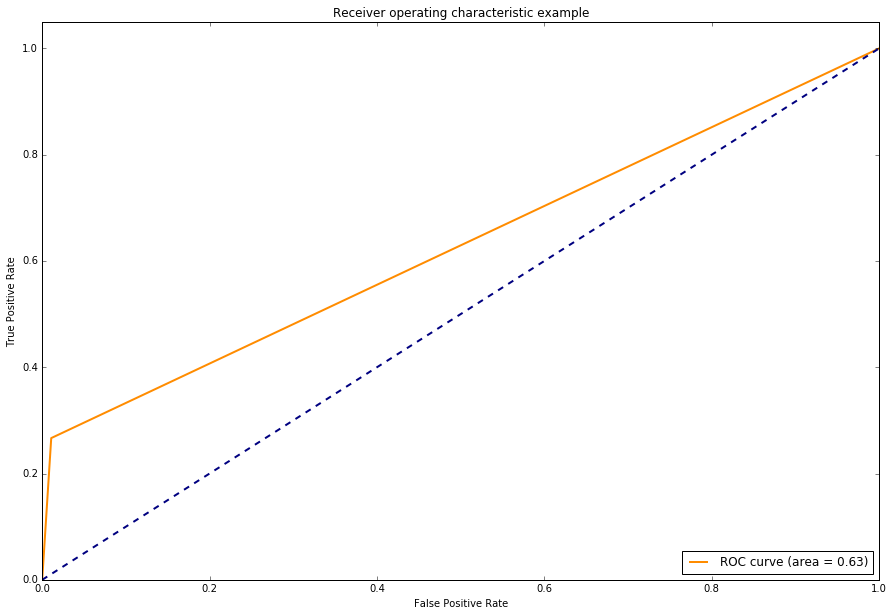

In [157]:
y_score = clf.predict(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(15, 10))
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# A Precision/Recall curve

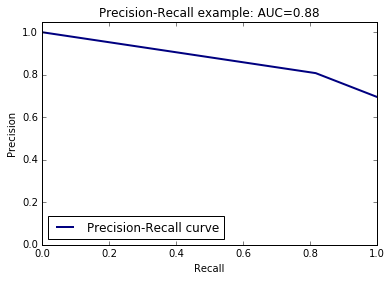

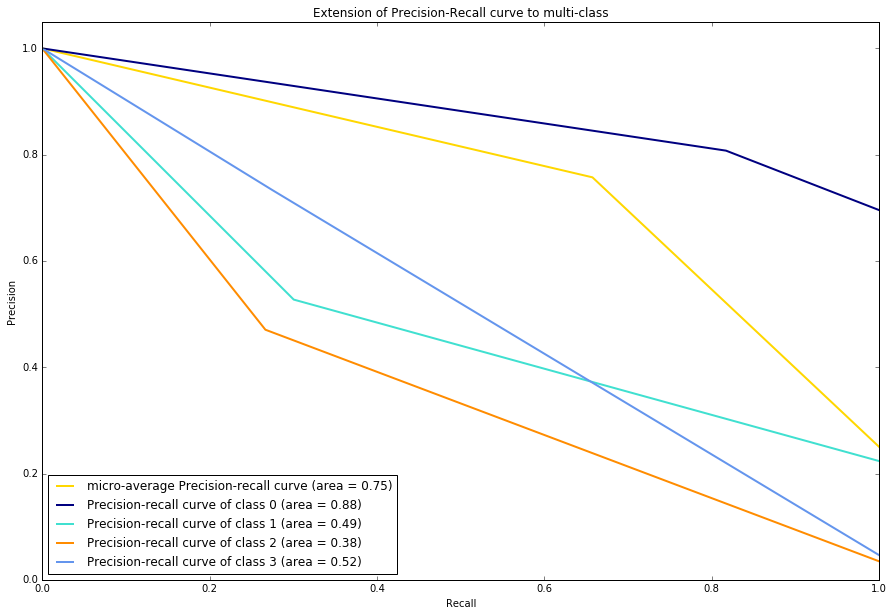

In [154]:
y_score = clf.predict(X_test)
# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")

colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.clf()
plt.plot(recall[0], precision[0], lw=2, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.figure(figsize=(15,10))
plt.plot(recall["micro"], precision["micro"], color='gold', lw=2,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower left")
plt.show()